### Importing Necessary Data

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Loading Dataset

In [2]:
data=pd.read_csv("./CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
condt=data.duplicated()
condt

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

### Dataset Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
print(data['CarName'].unique())           #categorical
print(data['fueltype'].unique())          #categorical
print(data['aspiration'].unique())        #categorical
print(data['doornumber'].unique())        #ordinal
print(data['carbody'].unique())           #categorical
print(data['drivewheel'].unique())        #categorical
print(data['enginelocation'].unique())    #categorical
print(data['enginetype'].unique())        #categorical
print(data['cylindernumber'].unique())    #ordinal
print(data['fuelsystem'].unique())        #categorical

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

### Converting categorical data to numerical

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['CarName'] = label_encoder.fit_transform(data['CarName'])
data['CarName'].unique()

array([  2,   3,   1,   4,   5,   9,   7,   6,   8,  10,  11,  12,  15,
        13,  14,  24,  25,  26,  35,  27,  32,  34,  29,  28,  30,  33,
        31,  39,  43,  37,  38,  42,  36,  41,  44,  40,  47,  45,  46,
        49,  48,  50,  52,  51,  61,  59,  58,  53,  54,  60,  55,  57,
        56,  19,  17,  16,  22,  20,  23,  18,  21,  62,  65,  64,  68,
        63,  66,  67,  69,   0,  73,  81,  76,  83,  77,  74,  78,  70,
        79,  71,  72,  80,  82,  75,  85,  84,  86,  88,  87,  92,  89,
        93,  91,  94,  90,  98,  95,  97,  96,  99, 100, 101, 103, 102,
       104, 107, 106, 105, 108, 109, 110, 111, 123, 120, 116, 121, 117,
       112, 125, 115, 118, 114, 119, 122, 126, 127, 124, 113, 128, 129,
       130, 133, 137, 131, 136, 132, 145, 146, 134, 135, 139, 138, 140,
       141, 143, 144, 142])

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['fueltype'] = label_encoder.fit_transform(data['fueltype'])
data['fueltype'].unique()

array([1, 0])

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['aspiration'] = label_encoder.fit_transform(data['aspiration'])
data['aspiration'].unique()

array([0, 1])

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['doornumber'] = label_encoder.fit_transform(data['doornumber'])
data['doornumber'].unique()

array([1, 0])

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['carbody'] = label_encoder.fit_transform(data['carbody'])
data['carbody'].unique()

array([0, 2, 3, 4, 1])

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['drivewheel'] = label_encoder.fit_transform(data['drivewheel'])
data['drivewheel'].unique()

array([2, 1, 0])

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['enginelocation'] = label_encoder.fit_transform(data['enginelocation'])
data['enginelocation'].unique()

array([0, 1])

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['enginetype'] = label_encoder.fit_transform(data['enginetype'])
data['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['cylindernumber'] = label_encoder.fit_transform(data['cylindernumber'])
data['cylindernumber'].unique()

array([2, 3, 1, 4, 5, 6, 0])

In [19]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['fuelsystem'] = label_encoder.fit_transform(data['fuelsystem'])
data['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [20]:
data.duplicated().sum()

0

### Correlation

In [ ]:
data.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


### Heatmap

<Axes: >

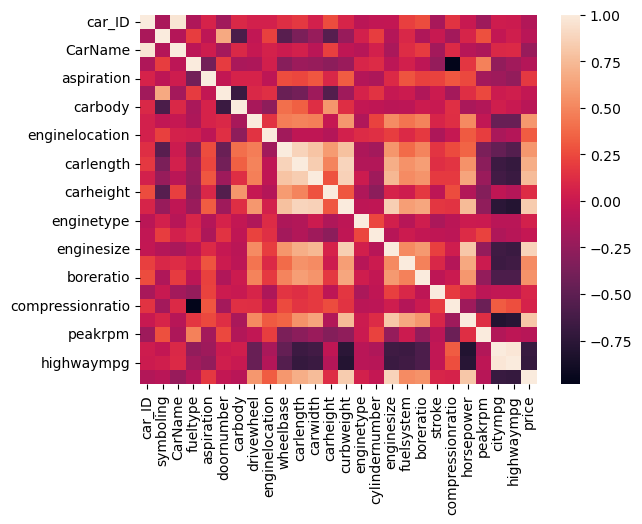

In [22]:
sns.heatmap(data.corr())

<Axes: >

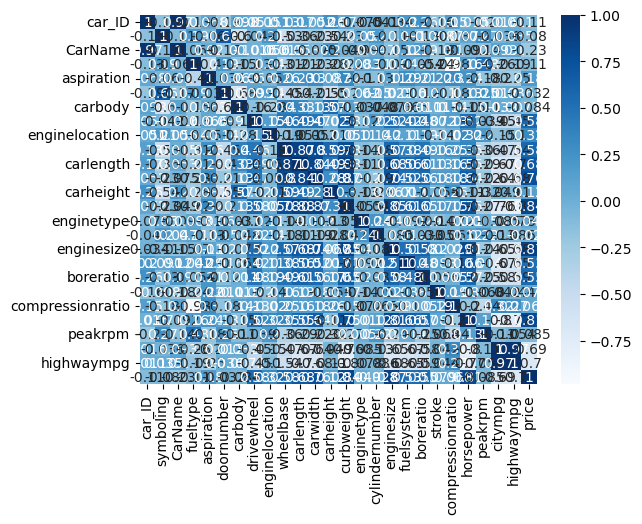

In [23]:
sns.heatmap(data.corr(), cmap="Blues", annot=True)

In [24]:
data.drop(['car_ID'],axis=1, inplace=True)
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [25]:
X=data.drop(['price'], axis=1)
y=data['price']
print(X)

     symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0            3        2         1           0           1        0   
1            3        3         1           0           1        0   
2            1        1         1           0           1        2   
3            2        4         1           0           0        3   
4            2        5         1           0           0        3   
..         ...      ...       ...         ...         ...      ...   
200         -1      139         1           0           0        3   
201         -1      138         1           1           0        3   
202         -1      140         1           0           0        3   
203         -1      142         0           1           0        3   
204         -1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  carlength  ...  cylindernumber  \
0             2               0       88.6      168.8  ...               2   
1  

### Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=10
)

In [27]:
lr_model = LinearRegression()

In [28]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pd.DataFrame(lr_model.coef_,X.columns,columns=['cofficient'])

,cofficient
symboling,-224.490961
CarName,-35.695873
fueltype,9911.960824
aspiration,1130.280625
doornumber,-1064.077167
carbody,-1177.816031
drivewheel,-158.539440
enginelocation,6547.192387
wheelbase,45.686100
carlength,6.329088


In [30]:
y_pred = lr_model.predict(X_test)

In [ ]:
com = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
com

,y_test,y_pred
131,9895.0,9343.806023
117,18150.0,18219.211037
63,10795.0,14303.461663
56,11845.0,10202.654520
49,36000.0,51419.988394
60,8495.0,11541.641928
19,6295.0,8457.059998
171,11549.0,12814.361030
163,8058.0,3498.152819
203,22470.0,20157.692787


In [32]:
len_test = len(y_pred)
len_test
default_arr = np.array(range(len_test))
default_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

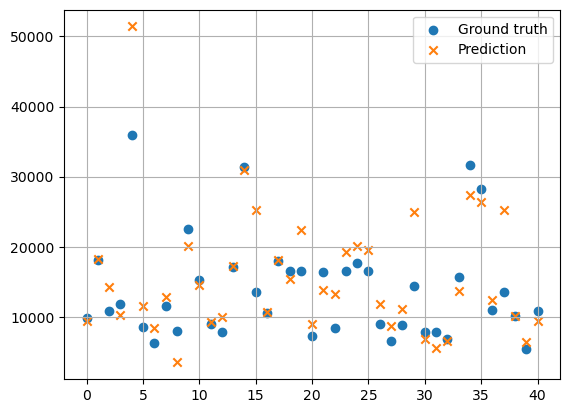

In [33]:
import matplotlib.pyplot as plt
plt.scatter(default_arr,y_test,marker='o',label="Ground truth")
plt.scatter(default_arr,y_pred,marker='x',label="Prediction")
plt.legend()
plt.grid()

In [34]:
lr_model.score(X_test,y_test)

0.6061618144782661

In [35]:
from sklearn import metrics
import numpy as np

In [36]:
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MSE

20354962.03302598

### Histogram

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'CarName'}>,
        <Axes: title={'center': 'fueltype'}>,
        <Axes: title={'center': 'aspiration'}>,
        <Axes: title={'center': 'doornumber'}>],
       [<Axes: title={'center': 'carbody'}>,
        <Axes: title={'center': 'drivewheel'}>,
        <Axes: title={'center': 'enginelocation'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginetype'}>,
        <Axes: title={'center': 'cylindernumber'}>],
       [<Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'fuelsystem'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>],
       [<Axes: title={'center': 'horsepow

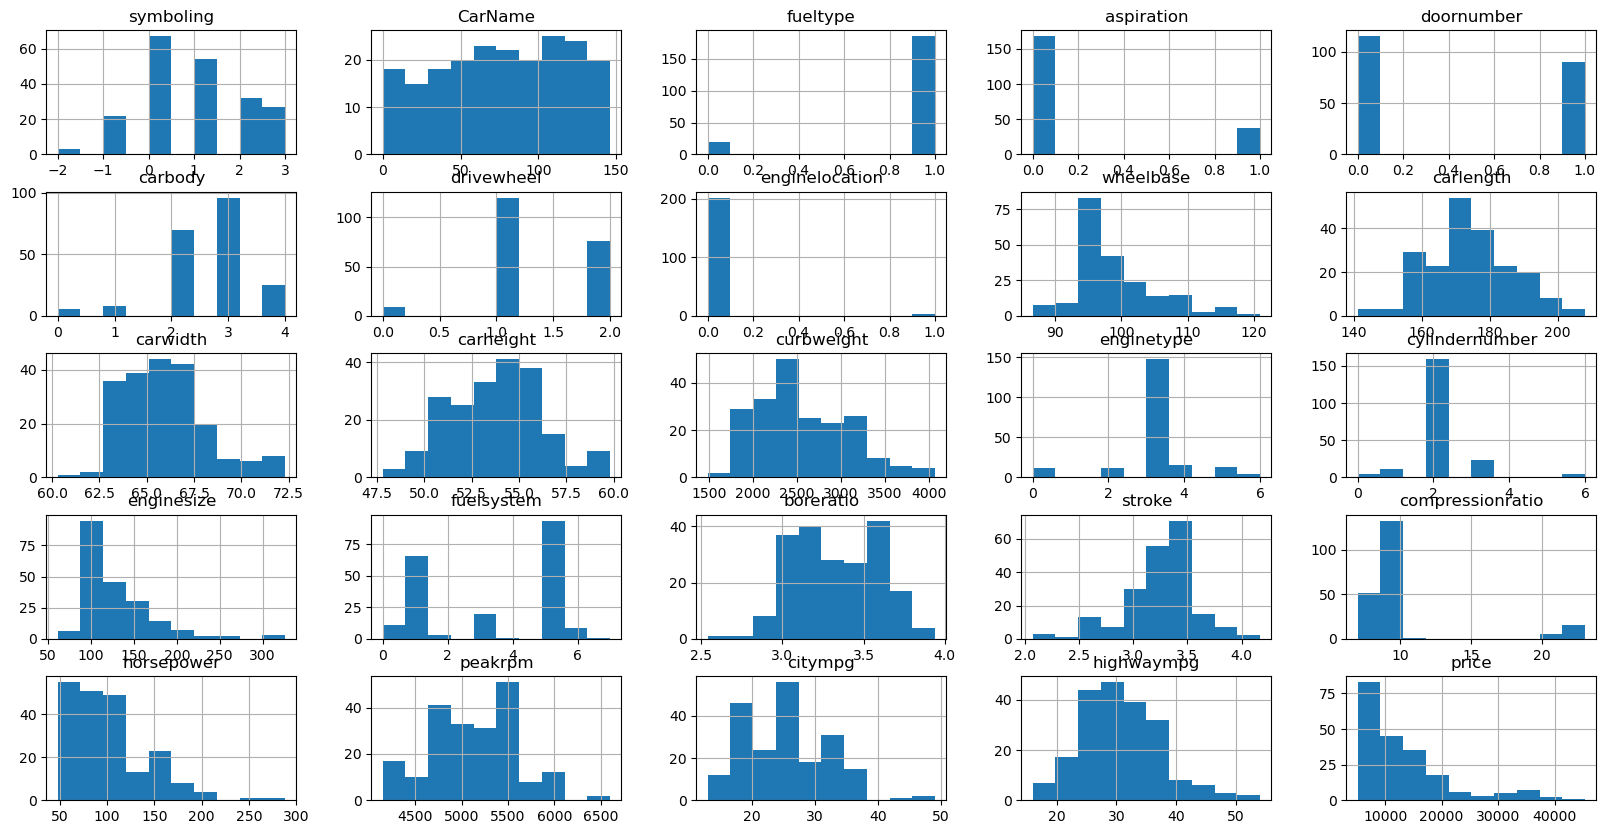

In [37]:
data.hist(figsize=(20,10))

### Decision Tree


In [38]:
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor()

In [39]:
decisionTree.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
decision_y_pred = decisionTree.predict(X_test)

In [41]:
decision = pd.DataFrame({'decision_y_test':y_test,'decision_y_pred':decision_y_pred})
decision

,decision_y_test,decision_y_pred
131,9895.0,9959.0
117,18150.0,19045.0
63,10795.0,10698.0
56,11845.0,10945.0
49,36000.0,40960.0
60,8495.0,10245.0
19,6295.0,6095.0
171,11549.0,11199.0
163,8058.0,7975.0
203,22470.0,16900.0


In [42]:
len_test =len(decision_y_pred)#how much length? 
len_test
default_arr= np.array(range(len_test))#array of data length
default_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [43]:
print("Accuracy:", decisionTree.score(X_test,y_test))

Accuracy: 0.8561259148346952


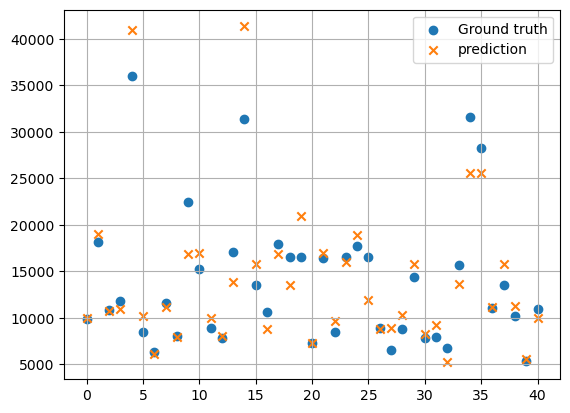

In [44]:
import matplotlib.pyplot as plt
plt.scatter(default_arr,y_test,marker='o',label="Ground truth")
plt.scatter(default_arr,decision_y_pred,marker='x',label="prediction")
plt.legend()
plt.grid()

In [45]:
from sklearn import metrics
import numpy as np

In [46]:
MSE = metrics.mean_squared_error(y_test,decision_y_pred)
#(45.1-47.62)^2
RMSE =np.sqrt(MSE)

In [47]:
MSE

7435925.841463415

In [48]:
RMSE

2726.889407633433